In [ ]:
#   **Introduction to Linear Regression 


#         What is Linear Regression?  
'''
Linear regression is one of the simplest and most widely used 
statistical and machine learning techniques for predicting a 
continuous numerical outcome based on one or more input features.
It models the relationship between a dependent variable (target) 
and one or more independent variables (predictors) by fitting a 
linear equation to the observed data.  The goal of linear 
regression is to find the best-fitting straight line (or 
hyperplane in higher dimensions) that minimizes the difference 
between the predicted and actual values.  
'''

In [13]:
# 1D Linear regression

<span style="font-size: 30px;">
$$ 
\begin{align}
y = \beta_0 + \beta_1 x + \epsilon\\
y  = dependent \ variable  \\  
x  = independent \ variable   \\
\beta_0  = y \ intercept   \\   
\beta_1  = slope        \\  
\epsilon  = error \  term  
\end{align}        
$$
</span>


In [ ]:
# nD linear regression or regression in a hyper space

<span style="font-size: 30px;">
$$ 
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \\
    \dots + \beta_n x_n + \epsilon
$$
</span>


In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn as sk

In [ ]:
### **Key Assumptions of Linear Regression**  
For reliable predictions, linear regression makes 
several assumptions:  
1. **Linearity**: The relationship between predictors 
and the target is linear.  
2. **Independence**: Observations are independent
of each other (no autocorrelation).  
5. **No Multicollinearity**: Independent variables
are not highly correlated with each other.  

In [ ]:
## **Evaluating Linear Regression Models**  
To assess the performance of a linear regression model, common metrics include:  
- **R-squared (Coefficient of Determination)**: Measures the proportion of variance in the dependent variable explained by the model (0 ≤ R² ≤ 1).  
- **Mean Squared Error (MSE)**: Average of squared errors (lower is better).  
- **Root Mean Squared Error (RMSE)**: Square root of MSE, in the same units as the target.  
- **Mean Absolute Error (MAE)**: Average of absolute errors, less sensitive to outliers.  

In [ ]:
## **Applications of Linear Regression**  
Linear regression is widely used in various fields, including:  
- **Economics**: Predicting GDP, stock prices, or sales trends.   
- **Marketing**: Analyzing the impact of advertising spend on sales.  
- **Engineering**: Modeling relationships between variables in experiments.  

In [ ]:
## **Limitations of Linear Regression**  
- Assumes a linear relationship, which may not hold in complex datasets.  
- Sensitive to outliers.  
- Cannot handle categorical variables directly (requires encoding).  
- Prone to overfitting with too many features (can be mitigated with regularization techniques like Ridge or Lasso regression).  

## **Conclusion**  
Linear regression is a foundational algorithm in statistics and machine learning, providing an intuitive way to model relationships between variables. While it has limitations, its simplicity and interpretability make it a valuable tool for predictive analysis.  

For more advanced scenarios, techniques like **polynomial regression**, **regularized regression (Ridge/Lasso)**, or other machine learning models may be used. However, understanding linear regression is essential for building a strong foundation in data science and analytics.  

Would you like a practical implementation example in Python using `scikit-learn`? Let me know! 🚀

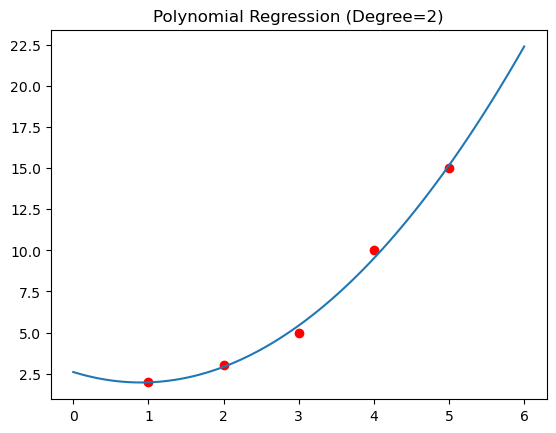

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 3, 5, 10, 15])

# Create polynomial regression model (degree=2)
model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
model.fit(X, y)

# Predictions
X_test = np.linspace(0, 6, 100).reshape(-1, 1)
y_pred = model.predict(X_test)

# Plot
plt.scatter(X, y, color='red')
plt.plot(X_test, y_pred)
plt.title('Polynomial Regression (Degree=2)')
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score

degrees = [1, 2, 3, 4]
scores = []

for d in degrees:
    model = make_pipeline(
        PolynomialFeatures(d),
        LinearRegression()
    )
    scores.append(cross_val_score(model, X, y, cv=5).mean())

print(f"Best degree: {degrees[np.argmax(scores)]}")

Best degree: 1


C:\ProgramData\anaconda2024\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda2024\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda2024\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda2024\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\anaconda2024\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samp

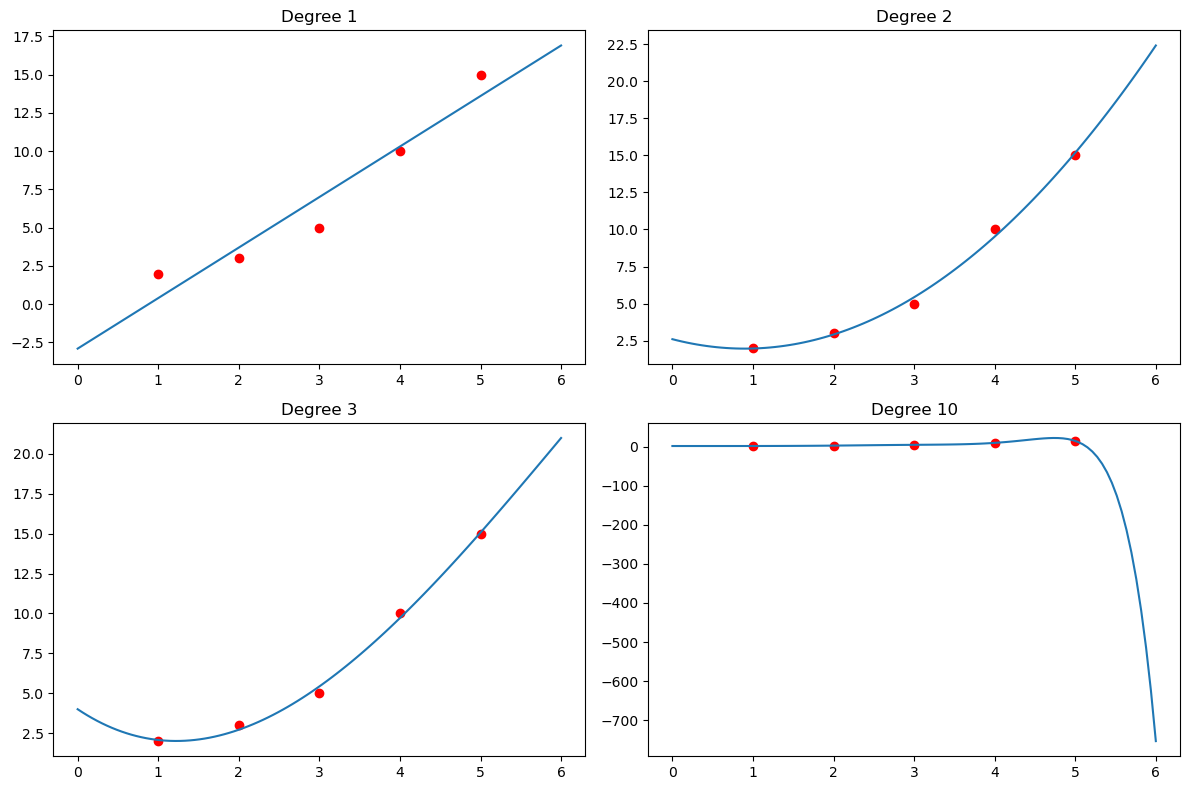

In [17]:
degrees = [1, 2, 3, 10]
plt.figure(figsize=(12, 8))

for i, d in enumerate(degrees):
    model = make_pipeline(
        PolynomialFeatures(d),
        LinearRegression()
    )
    model.fit(X, y)
    y_pred = model.predict(X_test)
    
    plt.subplot(2, 2, i+1)
    plt.scatter(X, y, color='red')
    plt.plot(X_test, y_pred)
    plt.title(f'Degree {d}')
    
plt.tight_layout()
plt.show()

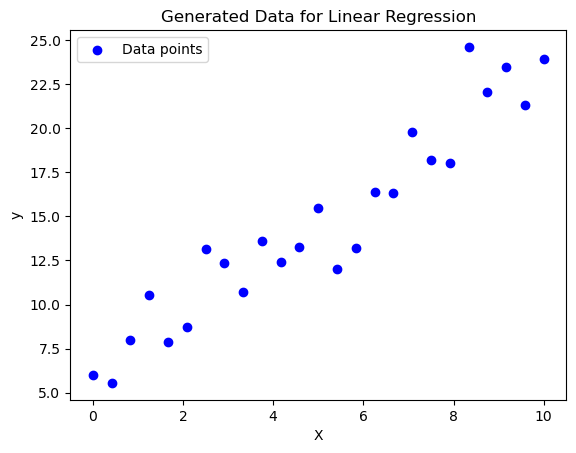

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate 25 random x points between 0 and 10
X = np.linspace(0, 10, 25)

# Generate y = 2x + 5 + some noise
true_slope = 2
true_intercept = 5
y = true_slope * X + true_intercept + np.random.normal(0, 2, 25)

# Plot the data
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data for Linear Regression')
plt.legend()
plt.show()

In [19]:
def mean_squared_error(X, y, m, b):
    """
    Calculate the Mean Squared Error (MSE) for given parameters m (slope) and b (intercept).
    
    Args:
        X (array): Input features
        y (array): True target values
        m (float): Slope of the line
        b (float): Intercept of the line
    
    Returns:
        float: MSE value
    """
    predictions = m * X + b
    error = y - predictions
    mse = np.mean(error ** 2)
    return mse

In [20]:
def gradient_mse(X, y, m, b):
    """
    Compute the gradient of MSE w.r.t. slope (m) and intercept (b).
    
    Args:
        X (array): Input features
        y (array): True target values
        m (float): Current slope
        b (float): Current intercept
    
    Returns:
        (float, float): Gradient w.r.t. m, Gradient w.r.t. b
    """
    N = len(X)
    predictions = m * X + b
    error = y - predictions
    
    # Gradient for slope (m)
    grad_m = (-2/N) * np.sum(X * error)
    
    # Gradient for intercept (b)
    grad_b = (-2/N) * np.sum(error)
    
    return grad_m, grad_b

In [21]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    """
    Perform gradient descent to find optimal slope (m) and intercept (b).
    
    Args:
        X (array): Input features
        y (array): True target values
        learning_rate (float): Step size for updates
        epochs (int): Number of iterations
    
    Returns:
        (float, float, list): Optimal m, Optimal b, MSE history
    """
    # Initialize random parameters
    m = np.random.randn()
    b = np.random.randn()
    
    mse_history = []
    
    for epoch in range(epochs):
        # Compute gradients
        grad_m, grad_b = gradient_mse(X, y, m, b)
        
        # Update parameters
        m = m - learning_rate * grad_m
        b = b - learning_rate * grad_b
        
        # Track MSE
        mse = mean_squared_error(X, y, m, b)
        mse_history.append(mse)
        
        # Print progress (optional)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: MSE = {mse:.4f}, m = {m:.4f}, b = {b:.4f}")
    
    return m, b, mse_history

Epoch 0: MSE = 37.5292, m = 1.9326, b = -0.8456
Epoch 100: MSE = 7.1024, m = 2.3313, b = 1.9853
Epoch 200: MSE = 4.3959, m = 2.0927, b = 3.5968
Epoch 300: MSE = 3.4406, m = 1.9510, b = 4.5542
Epoch 400: MSE = 3.1034, m = 1.8667, b = 5.1231
Epoch 500: MSE = 2.9843, m = 1.8167, b = 5.4610
Epoch 600: MSE = 2.9423, m = 1.7870, b = 5.6618
Epoch 700: MSE = 2.9275, m = 1.7693, b = 5.7811
Epoch 800: MSE = 2.9222, m = 1.7588, b = 5.8520
Epoch 900: MSE = 2.9204, m = 1.7526, b = 5.8941


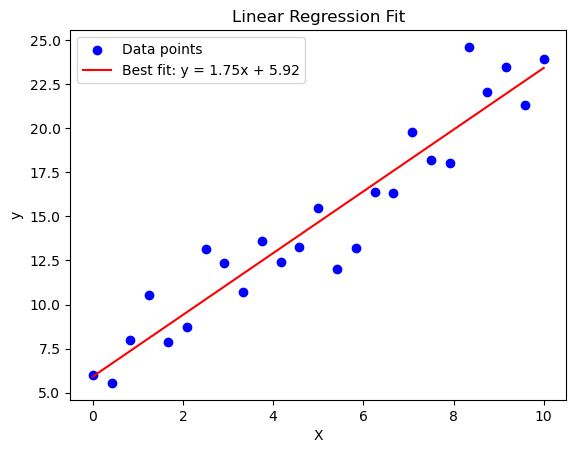

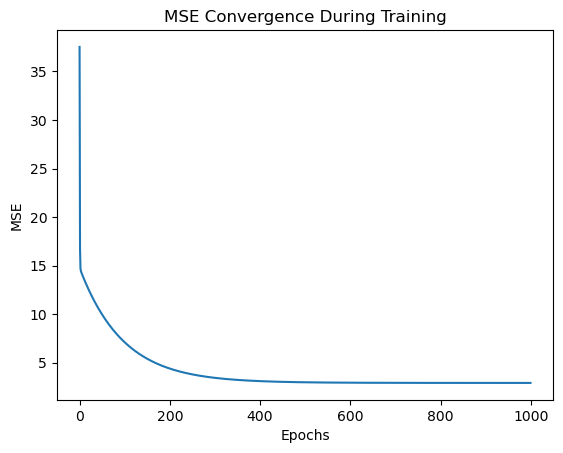

Optimal slope (m): 1.7489
Optimal intercept (b): 5.9189
Final MSE: 2.9198


In [22]:
# Run gradient descent
final_m, final_b, mse_history = gradient_descent(X, y, learning_rate=0.01, epochs=1000)

# Plot the best-fit line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, final_m * X + final_b, color='red', label=f'Best fit: y = {final_m:.2f}x + {final_b:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Plot MSE convergence
plt.plot(mse_history)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Convergence During Training')
plt.show()

print(f"Optimal slope (m): {final_m:.4f}")
print(f"Optimal intercept (b): {final_b:.4f}")
print(f"Final MSE: {mse_history[-1]:.4f}")